In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)

In [34]:
df = pd.read_csv('E:\Imarticus\Machine Learning\Paper1/MonthWiseMarketArrivals_Clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [35]:
df.shape

(10227, 10)

In [36]:
df.shape[1]

10

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [38]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [39]:
df.index = pd.PeriodIndex(df.date , freq = "M")

In [40]:
df.head(5)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [41]:
df_mumbai= df.loc[df.city == "MUMBAI"].copy()
df_mumbai.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008
2009-01,MUMBAI,January,2009,229000,1007,1513,1266,MS,MUMBAI,January-2009
2010-01,MUMBAI,January,2010,247150,867,1865,1366,MS,MUMBAI,January-2010
2011-01,MUMBAI,January,2011,262073,1788,3592,2660,MS,MUMBAI,January-2011
2012-01,MUMBAI,January,2012,262950,409,650,546,MS,MUMBAI,January-2012


In [42]:
df_mumbai.shape

(146, 10)

## Modal Price of Onion in Mumbai

In [43]:
df_mumbai_month = df_mumbai.groupby("month").sum()
df_mumbai_month[['priceMod']]

,priceMod
month,
April,7579
August,17129
December,15826
February,11245
January,14185
July,12578
June,10615
March,8092
May,8156


In [44]:
df_mumbai_month.head(5)

,year,quantity,priceMin,priceMax,priceMod
month,,,,,
April,24114,2819136,6252,8854,7579
August,24114,2217877,14637,19395,17129
December,24114,2942334,11576,19808,15826
February,26130,2951595,8947,13405,11245
January,26130,3445944,10645,17424,14185


<AxesSubplot:>

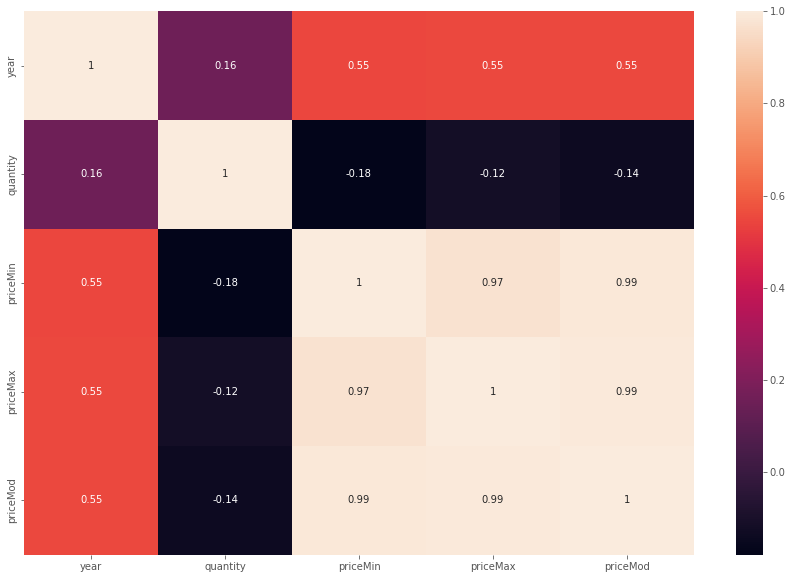

In [46]:
import seaborn as sns
sns.heatmap(df_mumbai.corr(),annot=True)

<AxesSubplot:xlabel='priceMod', ylabel='Count'>

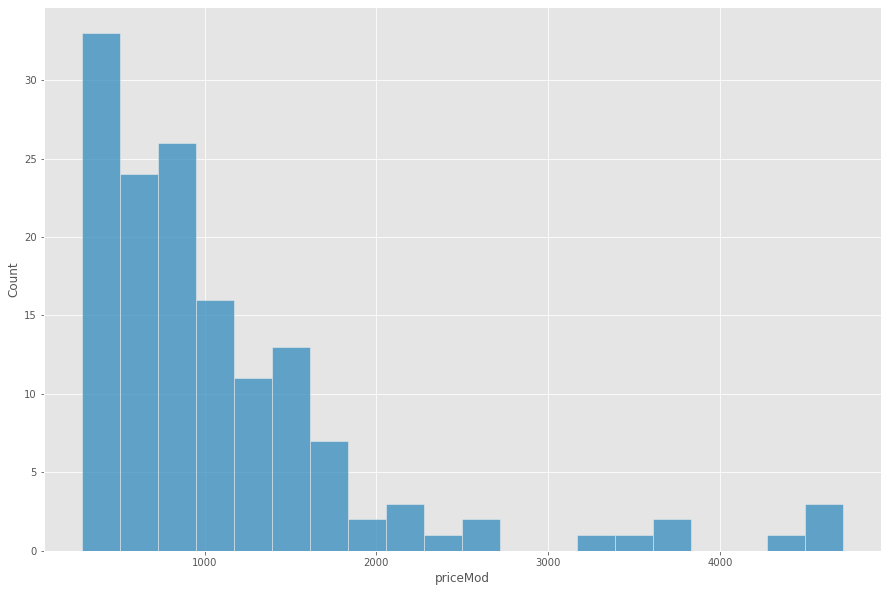

In [47]:
sns.histplot(df_mumbai['priceMod'],bins=20)

<AxesSubplot:xlabel='log_priceMod', ylabel='Count'>

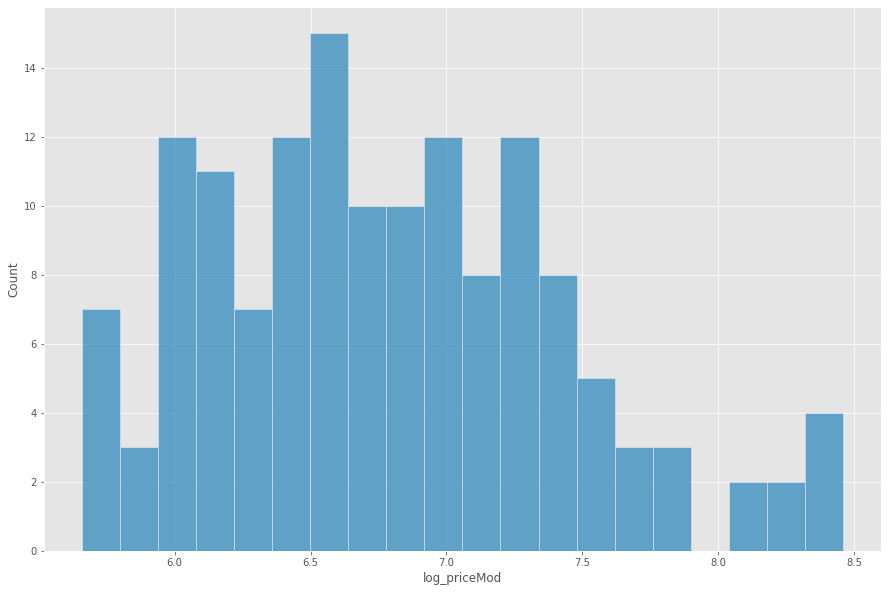

In [49]:
df_mumbai['log_priceMod'] = np.log(df_mumbai['priceMod'])
sns.histplot(df_mumbai['log_priceMod'] ,bins = 20)

# Model

In [52]:
df_mumbai_mean = df_mumbai['log_priceMod'].mean()
df_mumbai["mean_price"] = np.exp(df_mumbai_mean)
df_mumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,log_priceMod,mean_price
date,,,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004,6.744059,889.100239
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005,5.958425,889.100239
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006,5.996452,889.100239
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007,6.904751,889.100239
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008,6.104793,889.100239


<AxesSubplot:xlabel='date'>

<Figure size 1440x2160 with 0 Axes>

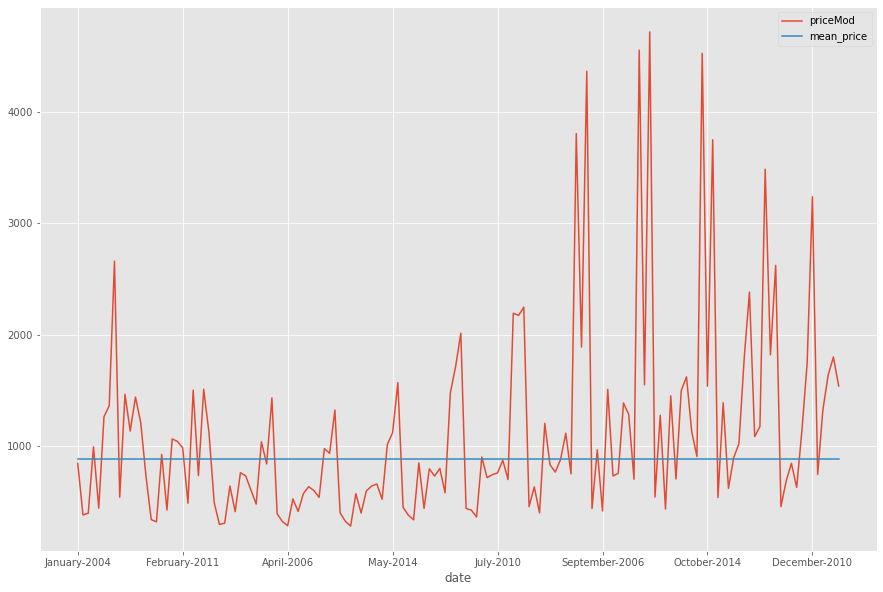

In [51]:
plt.figure(figsize = (20,30))
df_mumbai.plot(kind="line", x="date", y=["priceMod", "mean_price"])

# RMSE

In [53]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [54]:
modelRMSE = RMSE(df_mumbai.priceMod, df_mumbai.mean_price)
modelRMSE

908.4772843986449

# ACF and PACF plots

In [56]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
ts = df_mumbai['log_priceMod']
lag_acf = acf(ts, nlags=20)
lag_acf

C:\Users\ajaya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.31319668,  0.37165336, -0.06140673,  0.16869007,
       -0.02175521,  0.16634997,  0.01127215,  0.10597047, -0.07053858,
        0.27560045,  0.29894124,  0.78300906,  0.35419085,  0.29376392,
       -0.02414901,  0.1003445 ,  0.00663592,  0.1009527 ,  0.02262413,
        0.07107539])

<AxesSubplot:>

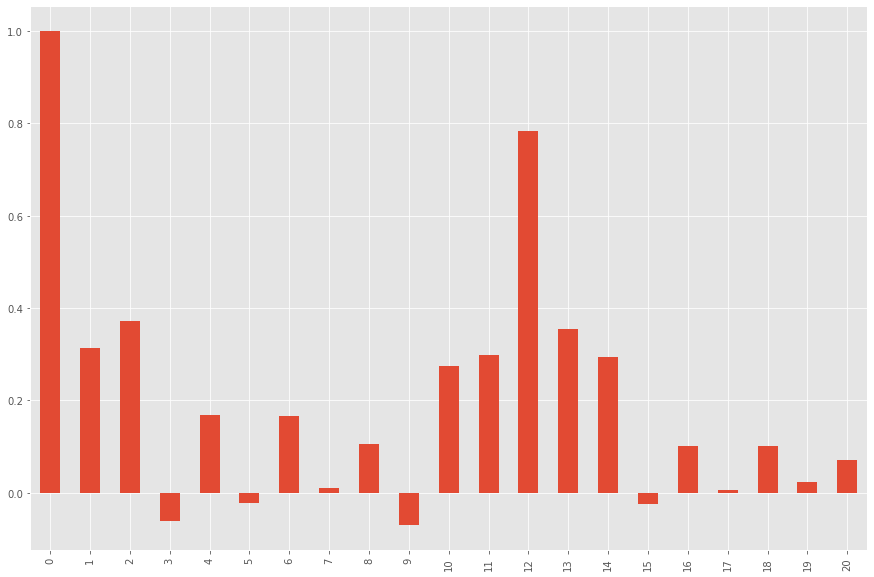

In [58]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar")

<AxesSubplot:>

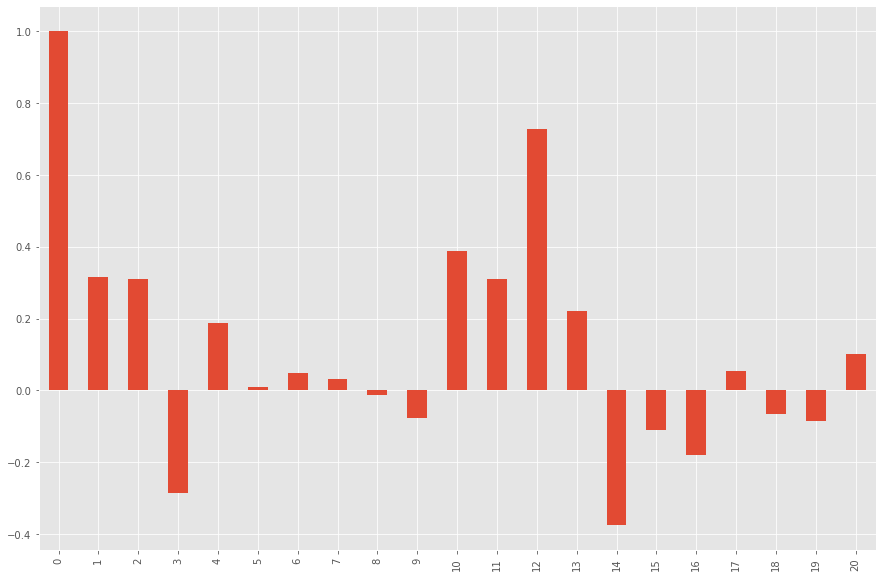

In [59]:
lag_pacf = pacf(ts, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar")